
# Lending Club Case Study

This assignment is created to solve and understand the real world problems faced by a Lending Club.

Here we will be working on the data provieded to us.

As we go through the steps to get an understand of data analisys and data processing and get some insight into risks and issues faced by a Lending Club.

## Our plan of action:
Before we start visualizing and drawing consultions we must:
1. Understanding the data: This involves ,
* seeing the raw data.
* finding the columns that might be of interest.
* seeing the values held by a column.
2. Cleaning the data: This would involve ,
* Dropping columns that dont have any values.
* Dropping columns that dont add any value to the data set.
* standardization of the values in the data set.
* Replace the null values if that can be done depending on the column.
3. Create new columns : We will now create columns that might give us a deeper insight into the data and help create more segmenting atributes .

### So lets get into it!


#### Installs you might need to run the notebook if you have a fresh install of Jupyter

In [1]:
#pip install pandas
#pip install numpy
#pip install matplotlib
#pip install seaborn


#### Imports needed

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#### Loading the data into a data set .

In [3]:
LC_Data = pd.read_csv("Data\loan.csv" ,index_col=False,dtype="unicode")

#### Lets View the data 

In [4]:
LC_Data.head()

id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
0  1077501   1296599      5000        5000            4975   36 months   
1  1077430   1314167      2500        2500            2500   60 months   
2  1077175   1313524      2400        2400            2400   36 months   
3  1076863   1277178     10000       10000           10000   36 months   
4  1075358   1311748      3000        3000            3000   60 months   

  int_rate installment grade sub_grade  ... num_tl_90g_dpd_24m  \
0   10.65%      162.87     B        B2  ...                NaN   
1   15.27%       59.83     C        C4  ...                NaN   
2   15.96%       84.33     C        C5  ...                NaN   
3   13.49%      339.31     C        C1  ...                NaN   
4   12.69%       67.79     B        B5  ...                NaN   

  num_tl_op_past_12m pct_tl_nvr_dlq percent_bc_gt_75 pub_rec_bankruptcies  \
0                NaN            NaN              NaN                    0   
1                NaN            NaN              NaN                    0   
2                NaN            NaN              NaN                    0   
3                NaN            NaN              NaN                    0   
4                NaN            NaN              NaN                    0   

  tax_liens tot_hi_cred_lim total_bal_ex_mort total_bc_limit  \
0         0             NaN               NaN            NaN   
1         0             NaN               NaN            NaN   
2         0             NaN               NaN            NaN   
3         0             NaN               NaN            NaN   
4         0             NaN               NaN            NaN   

  total_il_high_credit_limit  
0                        NaN  
1                        NaN  
2                        NaN  
3                        NaN  
4                        NaN  

[5 rows x 111 columns]

In [5]:
# Adding code to see all the columns of data set
pd.set_option('display.max_columns', 112)
LC_Data.head()

id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
0  1077501   1296599      5000        5000            4975   36 months   
1  1077430   1314167      2500        2500            2500   60 months   
2  1077175   1313524      2400        2400            2400   36 months   
3  1076863   1277178     10000       10000           10000   36 months   
4  1075358   1311748      3000        3000            3000   60 months   

  int_rate installment grade sub_grade                 emp_title emp_length  \
0   10.65%      162.87     B        B2                       NaN  10+ years   
1   15.27%       59.83     C        C4                     Ryder   < 1 year   
2   15.96%       84.33     C        C5                       NaN  10+ years   
3   13.49%      339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%       67.79     B        B5  University Medical Group     1 year   

  home_ownership annual_inc verification_status issue_d  loan_status  \
0           RENT      24000            Verified  Dec-11   Fully Paid   
1           RENT      30000     Source Verified  Dec-11  Charged Off   
2           RENT      12252        Not Verified  Dec-11   Fully Paid   
3           RENT      49200     Source Verified  Dec-11   Fully Paid   
4           RENT      80000     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti delinq_2yrs  \
0              Computer    860xx         AZ  27.65           0   
1                  bike    309xx         GA      1           0   
2  real estate business    606xx         IL   8.72           0   
3              personel    917xx         CA     20           0   
4              Personal    972xx         OR  17.94           0   

  earliest_cr_line inq_last_6mths mths_since_last_delinq  \
0           Jan-85              1                    NaN   
1           Apr-99              5                    NaN   
2           Nov-01              2                    NaN   
3           Feb-96              1                     35   
4           Jan-96              0                     38   

  mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc  \
0                    NaN        3       0     13648     83.70%         9   
1                    NaN        3       0      1687      9.40%         4   
2                    NaN        2       0      2956     98.50%        10   
3                    NaN       10       0      5598        21%        37   
4                    NaN       15       0     27783     53.90%        38   

  initial_list_status out_prncp out_prncp_inv  total_pymnt total_pymnt_inv  \
0                   f         0             0  5863.155187         5833.84   
1                   f         0             0      1008.71         1008.71   
2                   f         0             0  3005.666844         3005.67   
3                   f         0             0     12231.89        12231.89   
4                   f    524.06        524.06      3513.33         3513.33   

  total_rec_prncp total_rec_int total_rec_late_fee recoveries  \
0            5000        863.16                  0          0   
1    

## Cleaning the Data
#### Dropping columns 

In [6]:
# first lets find the total no. of rows
LC_Data.shape

(39717, 111)

In [7]:
# lets find all the columns with null values
LC_Data.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 111 columns):
 #    Column                          Non-Null Count  Dtype 
---   ------                          --------------  ----- 
 0    id                              39717 non-null  object
 1    member_id                       39717 non-null  object
 2    loan_amnt                       39717 non-null  object
 3    funded_amnt                     39717 non-null  object
 4    funded_amnt_inv                 39717 non-null  object
 5    term                            39717 non-null  object
 6    int_rate                        39717 non-null  object
 7    installment                     39717 non-null  object
 8    grade                           39717 non-null  object
 9    sub_grade                       39717 non-null  object
 10   emp_title                       37258 non-null  object
 11   emp_length                      38642 non-null  object
 12   home_ownership                

In [8]:
# as we see there are many columns with 0 non-null Values theya re of no use.
# we need to find the names of all the columns with 100% null values
null_percent = LC_Data.isnull().sum() * 100 / len(LC_Data)
missing_data=pd.DataFrame({"Column":LC_Data.columns,"Null_Percent":null_percent.round(1)})
missing_data.sort_values("Null_Percent",inplace=True, ascending= False)
# Lets manke a list of all the columns that have only null values
null_column = missing_data[missing_data['Null_Percent']==100.0].Column.tolist()
len(null_column)

54

In [9]:
# As we see we have 54 Columns that have no data we can drop them 
LC_Data_Nullcol_Dropped = LC_Data.drop(null_column,axis =1)
LC_Data_Nullcol_Dropped.shape

(39717, 57)

In [10]:
# Dropping Columns that dont add any value 
LC_Data_Nullcol_Dropped= LC_Data_Nullcol_Dropped.drop(["url","initial_list_status","collections_12_mths_ex_med","policy_code","application_type","acc_now_delinq","chargeoff_within_12_mths","delinq_amnt","tax_liens","pymnt_plan"],axis=1)
LC_Data_Nullcol_Dropped.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 47 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   id                       39717 non-null  object
 1   member_id                39717 non-null  object
 2   loan_amnt                39717 non-null  object
 3   funded_amnt              39717 non-null  object
 4   funded_amnt_inv          39717 non-null  object
 5   term                     39717 non-null  object
 6   int_rate                 39717 non-null  object
 7   installment              39717 non-null  object
 8   grade                    39717 non-null  object
 9   sub_grade                39717 non-null  object
 10  emp_title                37258 non-null  object
 11  emp_length               38642 non-null  object
 12  home_ownership           39717 non-null  object
 13  annual_inc               39717 non-null  object
 14  verification_status      39717 non-nul

In [11]:
# Dropping data that cannot be used for analysis (unique to row)
LC_Data_Nullcol_Dropped = LC_Data_Nullcol_Dropped.drop(["id","member_id","desc",],axis=1)
# look at % of nulls again 
null_percent = LC_Data_Nullcol_Dropped.isnull().sum() * 100 / len(LC_Data_Nullcol_Dropped)
missing_data=pd.DataFrame({"Column":LC_Data_Nullcol_Dropped.columns,"Null_Percent":null_percent.round(1)})
missing_data.sort_values("Null_Percent",inplace=True, ascending= False)
missing_data

Column  Null_Percent
next_pymnt_d                        next_pymnt_d          97.1
mths_since_last_record    mths_since_last_record          93.0
mths_since_last_delinq    mths_since_last_delinq          64.7
emp_title                              emp_title           6.2
emp_length                            emp_length           2.7
pub_rec_bankruptcies        pub_rec_bankruptcies           1.8
last_pymnt_d                        last_pymnt_d           0.2
revol_util                            revol_util           0.1
collection_recovery_fee  collection_recovery_fee           0.0
out_prncp_inv                      out_prncp_inv           0.0
open_acc                                open_acc           0.0
pub_rec                                  pub_rec           0.0
revol_bal                              revol_bal           0.0
total_acc                              total_acc           0.0
out_prncp                              out_prncp           0.0
total_pymnt                          total_pymnt           0.0
recoveries                            recoveries           0.0
total_pymnt_inv                  total_pymnt_inv           0.0
total_rec_prncp                  total_rec_prncp           0.0
last_credit_pull_d            last_credit_pull_d           0.0
total_rec_late_fee            total_rec_late_fee           0.0
last_pymnt_amnt                  last_pymnt_amnt           0.0
total_rec_int                      total_rec_int           0.0
loan_amnt                              loan_amnt           0.0
funded_amnt                          funded_amnt           0.0
earliest_cr_line                earliest_cr_line           0.0
funded_amnt_inv                  funded_amnt_inv           0.0
term                                        term           0.0
int_rate                                int_rate           0.0
installment                          installment           0.0
grade                                      grade           0.0
sub_grade                              sub_grade           0.0
home_ownership                    home_ownership           0.0
annual_inc                            annual_inc           0.0
verification_status          verification_status           0.0
issue_d                                  issue_d           0.0
loan_status                          loan_status           0.0
purpose                                  purpose           0.0
title                                      title           0.0
zip_code                                zip_code           0.0
addr_state                            addr_state           0.0
dti                                          dti           0.0
delinq_2yrs                          delinq_2yrs           0.0
inq_last_6mths                    inq_last_6mths           0.0

In [12]:
# Dropping the 1st 3 column names as they have very high Null Values
col_list=missing_data['Column'][:3].tolist()
LC_Data_Nullcol_Dropped=LC_Data_Nullcol_Dropped.drop(col_list,axis = 1)
LC_Data_Nullcol_Dropped.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   loan_amnt                39717 non-null  object
 1   funded_amnt              39717 non-null  object
 2   funded_amnt_inv          39717 non-null  object
 3   term                     39717 non-null  object
 4   int_rate                 39717 non-null  object
 5   installment              39717 non-null  object
 6   grade                    39717 non-null  object
 7   sub_grade                39717 non-null  object
 8   emp_title                37258 non-null  object
 9   emp_length               38642 non-null  object
 10  home_ownership           39717 non-null  object
 11  annual_inc               39717 non-null  object
 12  verification_status      39717 non-null  object
 13  issue_d                  39717 non-null  object
 14  loan_status              39717 non-nul

#### Data Type correction:

In [13]:
LC_Data_Nullcol_Dropped.issue_d=pd.to_datetime(LC_Data_Nullcol_Dropped.issue_d.str.upper(), format='%b-%y', yearfirst=False)
LC_Data_Nullcol_Dropped.earliest_cr_line=pd.to_datetime(LC_Data_Nullcol_Dropped.earliest_cr_line.str.upper(), format='%b-%y', yearfirst=False)
LC_Data_Nullcol_Dropped.last_pymnt_d=pd.to_datetime(LC_Data_Nullcol_Dropped.last_pymnt_d.str.upper(), format='%b-%y', yearfirst=False)
LC_Data_Nullcol_Dropped.last_credit_pull_d=pd.to_datetime(LC_Data_Nullcol_Dropped.last_credit_pull_d.str.upper(), format='%b-%y', yearfirst=False)


In [14]:
# Setting the data type of each column and standerdizing the data 
columns=['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc','revol_bal','dti', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries', 'collection_recovery_fee','last_pymnt_amnt','pub_rec_bankruptcies']
LC_Data_Nullcol_Dropped[columns]=LC_Data_Nullcol_Dropped[columns].astype(float)
LC_Data_Nullcol_Dropped.term = LC_Data_Nullcol_Dropped.term.apply(lambda x: int(x.replace(" months","")))
LC_Data_Nullcol_Dropped.int_rate=LC_Data_Nullcol_Dropped.int_rate.apply(lambda x:float(x[:-1]))
LC_Data_Nullcol_Dropped.grade=LC_Data_Nullcol_Dropped.grade.apply(lambda x:str(x))


In [15]:
#emp Length is defined in a way that will not allow for analisys so we will try to standerdize it 
#here 10+ years will be taken as 10
#here <1 will be 0.5
def emp_length_func(y):
    y=str(y)
    l=y.split(" y")
    if l[0] == "< 1":
        return 0.5
    elif l[0] =="10+":
        return 10
    elif l[0] == "nan":
        return None
    else:
        return int(l[0])

LC_Data_Nullcol_Dropped.emp_length= LC_Data_Nullcol_Dropped.emp_length.apply(emp_length_func)

In [16]:
LC_Data_Nullcol_Dropped.inq_last_6mths=LC_Data.inq_last_6mths.apply(lambda x : int(x))
LC_Data_Nullcol_Dropped.delinq_2yrs=LC_Data_Nullcol_Dropped.delinq_2yrs.apply(lambda x : int(x))
LC_Data_Nullcol_Dropped.open_acc=LC_Data_Nullcol_Dropped.open_acc.apply(lambda x : int(x))
LC_Data_Nullcol_Dropped.pub_rec=LC_Data_Nullcol_Dropped.pub_rec.apply(lambda x : int(x))

In [17]:
LC_Data_Nullcol_Dropped.revol_util=LC_Data_Nullcol_Dropped.revol_util.apply(lambda x:float(x[:-1]) if str(x)[-1] == "%" else float(x))
LC_Data_Nullcol_Dropped.total_acc=LC_Data_Nullcol_Dropped.total_acc.apply(lambda x : int(x))

In [18]:
LC_Data_Nullcol_Dropped.info(verbose = True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   loan_amnt                39717 non-null  float64       
 1   funded_amnt              39717 non-null  float64       
 2   funded_amnt_inv          39717 non-null  float64       
 3   term                     39717 non-null  int64         
 4   int_rate                 39717 non-null  float64       
 5   installment              39717 non-null  float64       
 6   grade                    39717 non-null  object        
 7   sub_grade                39717 non-null  object        
 8   emp_title                37258 non-null  object        
 9   emp_length               38642 non-null  float64       
 10  home_ownership           39717 non-null  object        
 11  annual_inc               39717 non-null  float64       
 12  verification_status      39717 n

In [19]:
null_count = LC_Data_Nullcol_Dropped.isnull().sum()
missing_data=pd.DataFrame({"Column":LC_Data_Nullcol_Dropped.columns,"Null Val":null_count})
missing_data.sort_values("Null Val",inplace=True, ascending= False)
missing_data[missing_data['Null Val']>0]

Column  Null Val
emp_title                        emp_title      2459
emp_length                      emp_length      1075
pub_rec_bankruptcies  pub_rec_bankruptcies       697
last_pymnt_d                  last_pymnt_d        71
revol_util                      revol_util        50
title                                title        11
last_credit_pull_d      last_credit_pull_d         2

In [20]:
#Lets go through the column with the highest null values
LC_Data_Nullcol_Dropped.emp_title.value_counts()

US Army                              134
Bank of America                      109
IBM                                   66
AT&T                                  59
Kaiser Permanente                     56
                                    ... 
Community College of Philadelphia      1
AMEC                                   1
lee county sheriff                     1
Bacon County Board of Education        1
Evergreen Center                       1
Name: emp_title, Length: 28820, dtype: int64

In [21]:
#Since the most common factor in this feild is only 0.3 % of the total data set and there are 6% null values we can drop this column
LC_Data_Nullcol_Dropped.drop('emp_title',axis=1)

loan_amnt  funded_amnt  funded_amnt_inv  term  int_rate  installment  \
0         5000.0       5000.0           4975.0    36     10.65       162.87   
1         2500.0       2500.0           2500.0    60     15.27        59.83   
2         2400.0       2400.0           2400.0    36     15.96        84.33   
3        10000.0      10000.0          10000.0    36     13.49       339.31   
4         3000.0       3000.0           3000.0    60     12.69        67.79   
...          ...          ...              ...   ...       ...          ...   
39712     2500.0       2500.0           1075.0    36      8.07        78.42   
39713     8500.0       8500.0            875.0    36     10.28       275.38   
39714     5000.0       5000.0           1325.0    36      8.07       156.84   
39715     5000.0       5000.0            650.0    36      7.43       155.38   
39716     7500.0       7500.0            800.0    36     13.75       255.43   

      grade sub_grade  emp_length home_ownership  annual_inc  \
0         B        B2        10.0           RENT     24000.0   
1         C        C4         0.5           RENT     30000.0   
2         C        C5        10.0           RENT     12252.0   
3         C        C1        10.0           RENT     49200.0   
4         B        B5         1.0           RENT     80000.0   
...     ...       ...         ...            ...         ...   
39712     A        A4         4.0       MORTGAGE    110000.0   
39713     C        C1         3.0           RENT     18000.0   
39714     A        A4         0.5       MORTGAGE    100000.0   
39715     A        A2         0.5       MORTGAGE    200000.0   
39716     E        E2         0.5            OWN     22000.0   

      verification_status    issue_d  loan_status             purpose  \
0                Verified 2011-12-01   Fully Paid         credit_card   
1         Source Verified 2011-12-01  Charged Off                 car   
2            Not Verified 2011-12-01   Fully Paid      small_business   
3         Source Verified 2011-12-01   Fully Paid               other   
4         Source Verified 2011-12-01      Current               other   
...                   ...        ...          ...                 ...   
39712        Not Verified 2007-07-01   Fully Paid    home_improvement   
39713        Not Verified 2007-07-01   Fully Paid         credit_card   
39714        Not Verified 2007-07-01   Fully Paid  debt_consolidation   
39715        Not Verified 2007-07-01   Fully Paid               other   
39716        Not Verified 2007-06-01   Fully Paid  debt_consolidation   

                           title zip_code addr_state    dti  delinq_2yrs  \
0                       Computer    860xx         AZ  27.65            0   
1                           bike    309xx         GA   1.00            0   
2           real estate business    606xx         IL   8.72            0   
3                       personel    917xx         CA  20.00            0   
4                       Personal    972xx         OR  17.94            0   
...                          ...      ...        ...    ...          ...   
39712           Home Improvement    802xx         CO  11.33            0   
39713  Retiring credit card debt    274xx         NC   6.40            1   
39714     MBA Loan Consolidation    017xx         MA   2.30            0   
39715                   JAL Loan    208xx         MD   3.72            0   
39716         Consolidation Loan    027xx         MA  14.29            1   

      earliest_cr_line  inq_last_6mths  open_acc  pub_rec  revol_bal  \
0           1985-01-01               1         3        0    13648.0   
1           1999-04-01               5         3        0     1687.0   
2           2001-11-01               2         2        0     2956.0   
3           1996-02-01               1        10        0     5598.0   
4           1996-01-01               0        15        0    27783.0   
...                ...             ...       ...      ...        ..

In [22]:
#Look For duplicates in our data set
LC_Data_Nullcol_Dropped[LC_Data_Nullcol_Dropped.duplicated()]
# We have no duplicates 

Empty DataFrame
Columns: [loan_amnt, funded_amnt, funded_amnt_inv, term, int_rate, installment, grade, sub_grade, emp_title, emp_length, home_ownership, annual_inc, verification_status, issue_d, loan_status, purpose, title, zip_code, addr_state, dti, delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d, pub_rec_bankruptcies]
Index: []

In [23]:
#Setting Categoric data 
col = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state','delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
LC_Data_Nullcol_Dropped[col] = LC_Data_Nullcol_Dropped[col].apply(lambda x: x.astype('category'))

In [24]:
# Now that we have all the columns set in the right format we can keep that and copy and we have our final data frame for EDA
Data_LC = LC_Data_Nullcol_Dropped.copy(deep= True)
#Create a CSV that dropped out side the notebook to have a check point
LC_Data_Nullcol_Dropped.to_csv("New_Data.csv", index=False,mode='w+')
# From this point on we will not be dropping any more columns 

In [25]:
#[str(x).zfill(2) for x in pd.DatetimeIndex(Data_LC['issue_d']).day]


## Exploratory Data Analytics

In [26]:
# List out the number of unique values in each column to see what ca be used to univariant analisys
temp_list=[]
for col in Data_LC.columns.to_list():
    temp_list.append({"Column":col,"Values" : len(Data_LC[col].unique())})
col_val=pd.DataFrame(temp_list).sort_values('Values')
col_val.head(10)

Column  Values
3                   term       2
14           loan_status       3
12   verification_status       3
40  pub_rec_bankruptcies       4
24               pub_rec       5
10        home_ownership       5
6                  grade       7
22        inq_last_6mths       9
20           delinq_2yrs      11
9             emp_length      12

#### Univariant Analisys

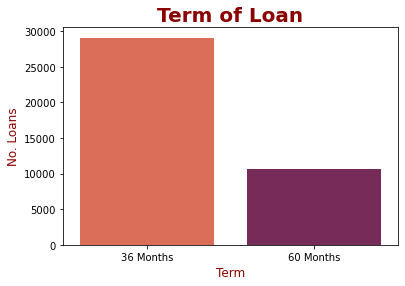

In [27]:
# See the count of each value in "term"
sns.countplot(x= Data_LC['term'],palette="rocket_r")
values=Data_LC['term'].unique()
update=[str(x)+" Months" for x in values]
font={'color':'darkred','weight':'heavy','size':20}
font2={'color':'darkred','weight':'normal','size':12}
plt.title("Term of Loan",fontdict=font)
plt.xlabel("Term",fontdict=font2)
plt.ylabel("No. Loans",fontdict=font2)
plt.xticks([0,1],update)

plt.show()

Most Loans are of 3 Years

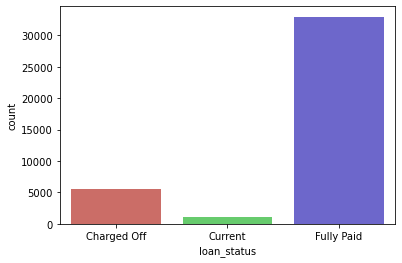

In [28]:
#Visualize Loan Status
sns.countplot(x= Data_LC['loan_status'],palette="hls")
plt.show()

* Most loans are paid off
* 14%-15% of the loans are the defaulters 

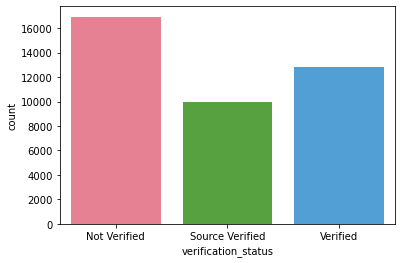

In [29]:
# visualize Verification status
sns.countplot(x= Data_LC['verification_status'],palette="husl")
plt.show()

* 40% -45% of the loans are unverified

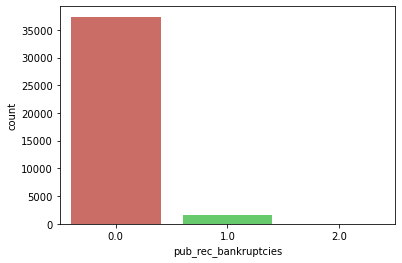

In [30]:
# visualize public bankrupcy
sns.countplot(x= Data_LC['pub_rec_bankruptcies'],palette="hls")
plt.show()

Inconclusive

In [31]:
#looking a loan amount to understand its values
Data_LC.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

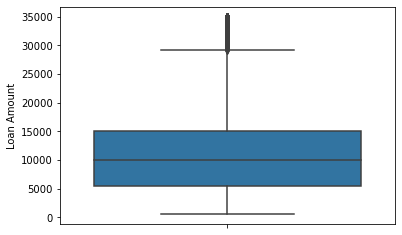

In [32]:
#Since the mean and median are not similar lets look at the box plot
sns.boxplot(y=Data_LC.loan_amnt)
plt.ylabel("Loan Amount")
plt.show()

 Looks Like we have outliers from 30,000 onwards

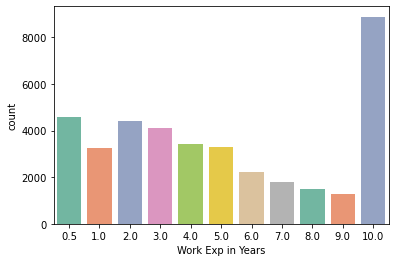

In [33]:
#Analysis of work exp of loan applicants
sns.countplot(x=Data_LC.emp_length,palette='Set2')
plt.xlabel("Work Exp in Years")
plt.show()

* Majority of loan aplicants have Work Exp of 10 years or more
* Least number of people who applied for the loan are with work exp between  

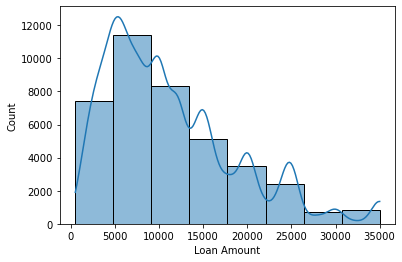

In [34]:
# analysis of loan amount
sns.histplot(data=Data_LC,x="loan_amnt",bins=8,kde=True,)
plt.xlabel("Loan Amount")
plt.show()

Most common Loan Amount applied is in the range of 5000-10000

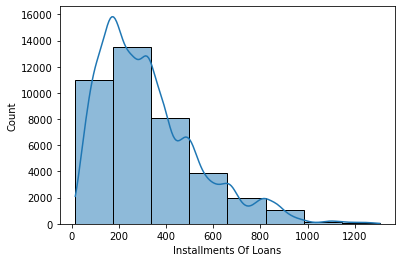

In [35]:
#analisys of Installment Column
sns.histplot(data=Data_LC,x="installment",bins=8,kde=True)
plt.xlabel("Installments Of Loans")
plt.show()

Here we can see most of the applicants pay around $200 as installment

In [36]:
#analisys of annual income
Data_LC.annual_inc.describe().apply(lambda x: format(x, 'f'))

count      39717.000000
mean       68968.926377
std        63793.765790
min         4000.000000
25%        40404.000000
50%        59000.000000
75%        82300.000000
max      6000000.000000
Name: annual_inc, dtype: object

There is a huge gap between 75% and max which means there are huge outliers we need to see it more closely

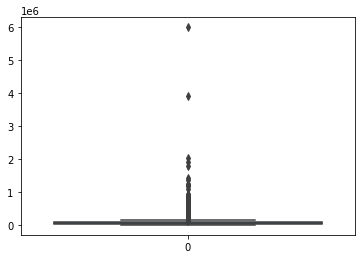

In [37]:
sns.boxplot(data=Data_LC.annual_inc)
plt.yscale='log'
plt.show()

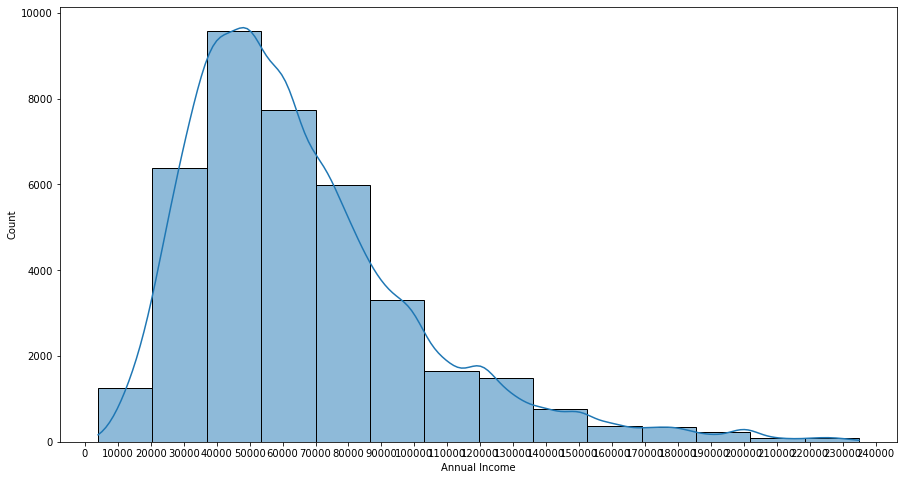

398 records left out as outliers for this plot that is the last 1%


In [38]:
ann_inc_no_out=Data_LC.annual_inc[Data_LC.annual_inc<np.percentile(Data_LC.annual_inc,99)]
diff=len(Data_LC.annual_inc)-len(ann_inc_no_out)
plt.figure(figsize=(15,8))
sns.histplot(x=ann_inc_no_out,bins=14,kde=True)

plt.xlabel("Annual Income")
plt.xticks(list(range(0,250000,10000)))
plt.show()
print(diff,"records left out as outliers for this plot that is the last 1%")


Removing the outliers we get a graph that shows us that most of the applicants have an annual income between 40,000 and 50,000

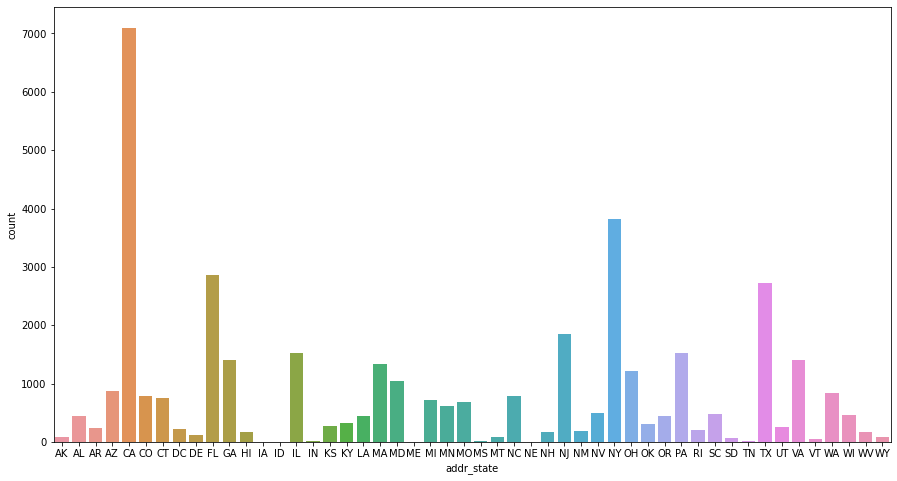

In [39]:
#analisys of the states that applied for the most loans
plt.figure(figsize=(15,8))
sns.countplot(x=Data_LC.addr_state)
plt.show()

Largest Number of Loan aplicants are from California

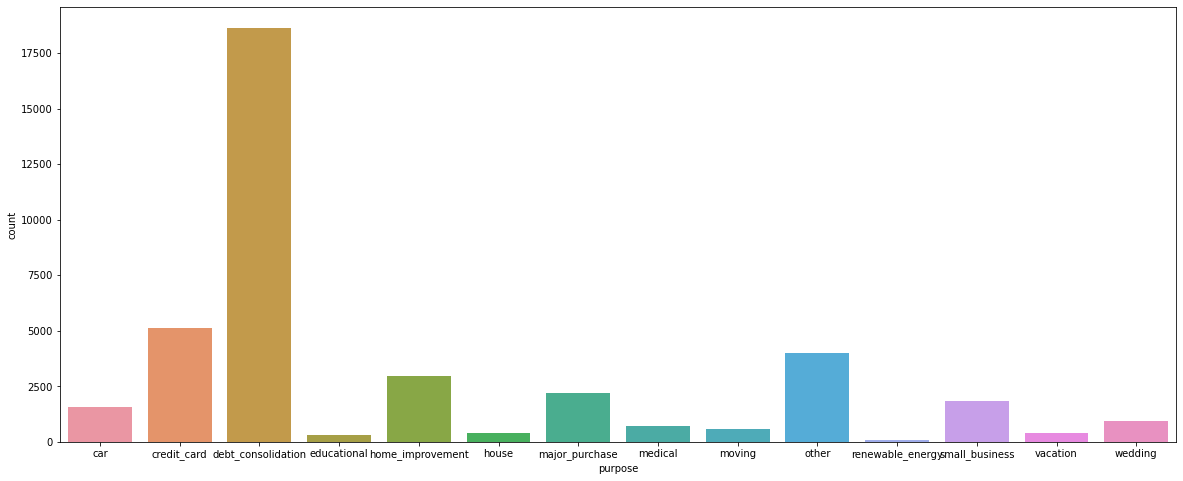

In [40]:
# analisys of Purpose of loan
plt.figure(figsize=(20,8))
sns.countplot(x=Data_LC.purpose)
plt.show()

Most common reason to take loan is to consolidate debt into a single loan

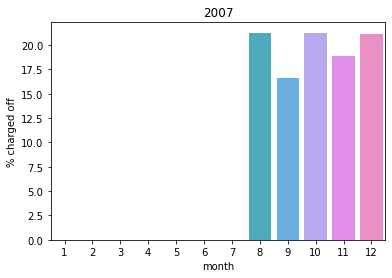

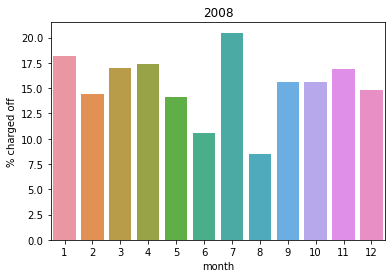

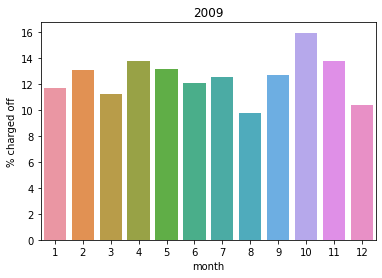

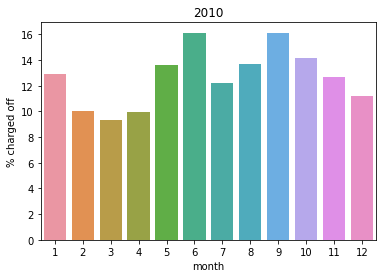

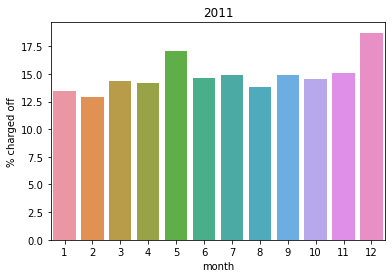

In [41]:
year_wise = pd.DataFrame()
year_list = []
month_list =[]
issued_list =[]
charge_off_list = []
percent_charged_off_list =[]

for year in range(2007,2012):
    for month in range(1,13):
        year_list.append(year)
        month_list.append(month)
        charge_off = Data_LC[(pd.DatetimeIndex(Data_LC['issue_d']).year == year) & (pd.DatetimeIndex(Data_LC['issue_d']).month == month) & (Data_LC.loan_status == 'Charged Off')].loan_amnt.count()
        issued = Data_LC[(pd.DatetimeIndex(Data_LC['issue_d']).year == year) & (pd.DatetimeIndex(Data_LC['issue_d']).month == month)].loan_amnt.count()
        charge_off_list.append(charge_off)
        issued_list.append(issued)
        percent_charged_off_list.append(round(charge_off/issued*100,2))

year_wise['year'] = year_list
year_wise['month'] = month_list
year_wise['issued']= issued_list
year_wise['charged off'] = charge_off_list
year_wise['% charged off'] = percent_charged_off_list

for year in range(2007,2012):
    plt.title(year)
    yearly_ds = year_wise[year_wise.year == year]
    sns.barplot(data = yearly_ds,x = yearly_ds.month, y = yearly_ds['% charged off'])
    plt.show()

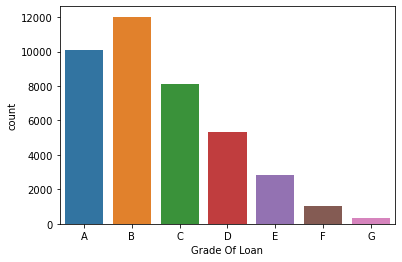

In [42]:
# Analisys of Loan Grade
sns.countplot(x=Data_LC.grade)
plt.xlabel("Grade Of Loan")
plt.show()

65%-70% of the loans are Grade A or B

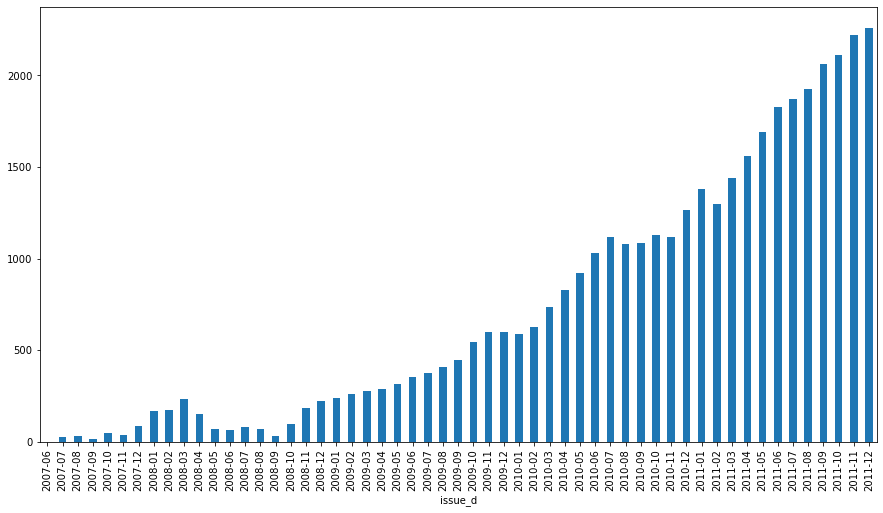

In [43]:
month= Data_LC.issue_d.unique()
month=[str(x)[:7] for x in month ]
r=list(range(len(month)))
monthly = Data_LC.groupby(by = 'issue_d').loan_amnt.count()
plt.figure(figsize=(15,8))
monthly.plot(kind ='bar')
plt.xticks(r,month[::-1])
plt.show()

#We can see that there is a dip in the number of loans around 2008 Sep, Oct timeperiod and after that it starts to rise and expands very rapidly
#What could explain this dip in the number of loans...the 2008 Financial Crisis?

### Segmented Univariant Analysis
###### We will now Filter the data based on primary analysis filter and look at singular rows

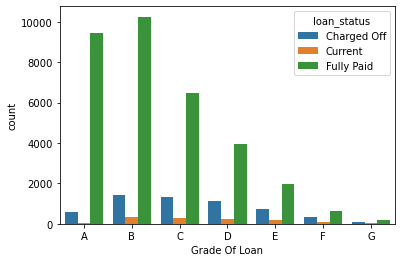

In [44]:
# Lets look at how the grading system used by the Lending Club is performing 
sns.countplot(x=Data_LC.grade , hue= Data_LC.loan_status)
plt.xlabel("Grade Of Loan")
plt.show()


Grade has no substantial relation to defaulers

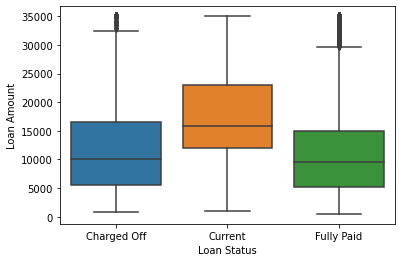

In [45]:
sns.boxplot( y="loan_amnt", x="loan_status" , data=Data_LC)
plt.ylabel("Loan Amount")
plt.xlabel("Loan Status")
plt.show()

Loan Amount has no corelation with defaulters

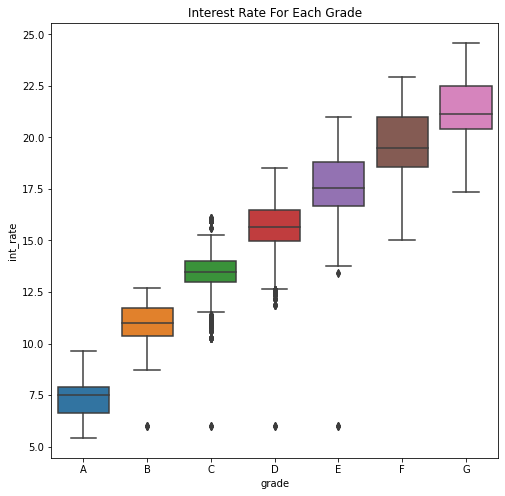

In [46]:
plt.figure(figsize=(8,8))
sns.boxplot(y='int_rate', x='grade', data=Data_LC)
plt.title('Interest Rate For Each Grade')
plt.show()

We can see as the Grade goes down the interest rate given goes up comparing this to the loans that defauled below

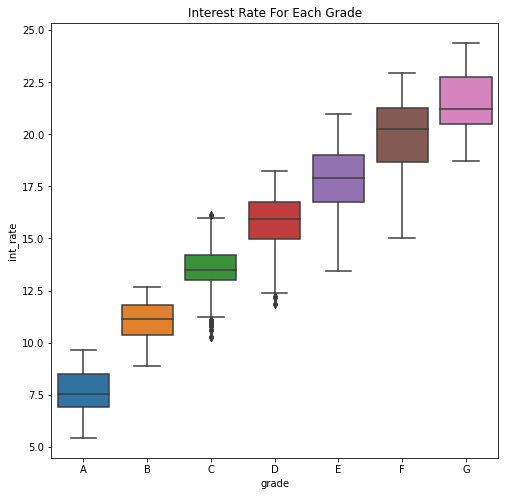

In [47]:
plt.figure(figsize=(8,8))
sns.boxplot(y='int_rate', x='grade', data=Data_LC[Data_LC['loan_status']=='Charged Off'])
plt.title('Interest Rate For Each Grade')
plt.show()

No noticeble difference found

In [48]:
temp=Data_LC[Data_LC['loan_status']=='Charged Off']
percent_default_36=len(temp[temp['term']==36])*100/len(temp)
percent_default_60=len(temp[temp['term']==60])*100/len(temp)
print(percent_default_36,percent_default_60)                       

57.34849831171139 42.65150168828861


57% of Defaulters are the ones whos loans are of 36 months 

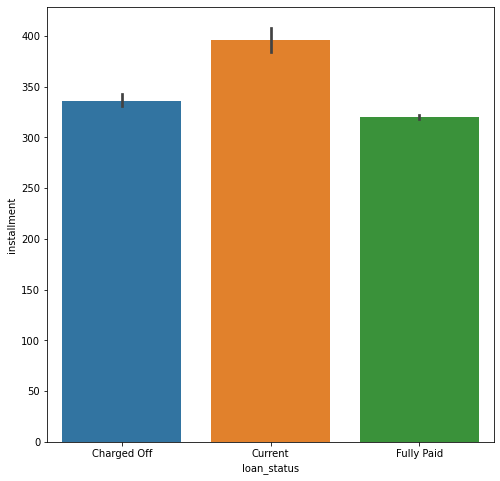

In [49]:
plt.figure(figsize=(8,8))
sns.barplot(x='loan_status',y='installment',data= Data_LC)
plt.show()

Higher Installment shows higher chance of Defaulting

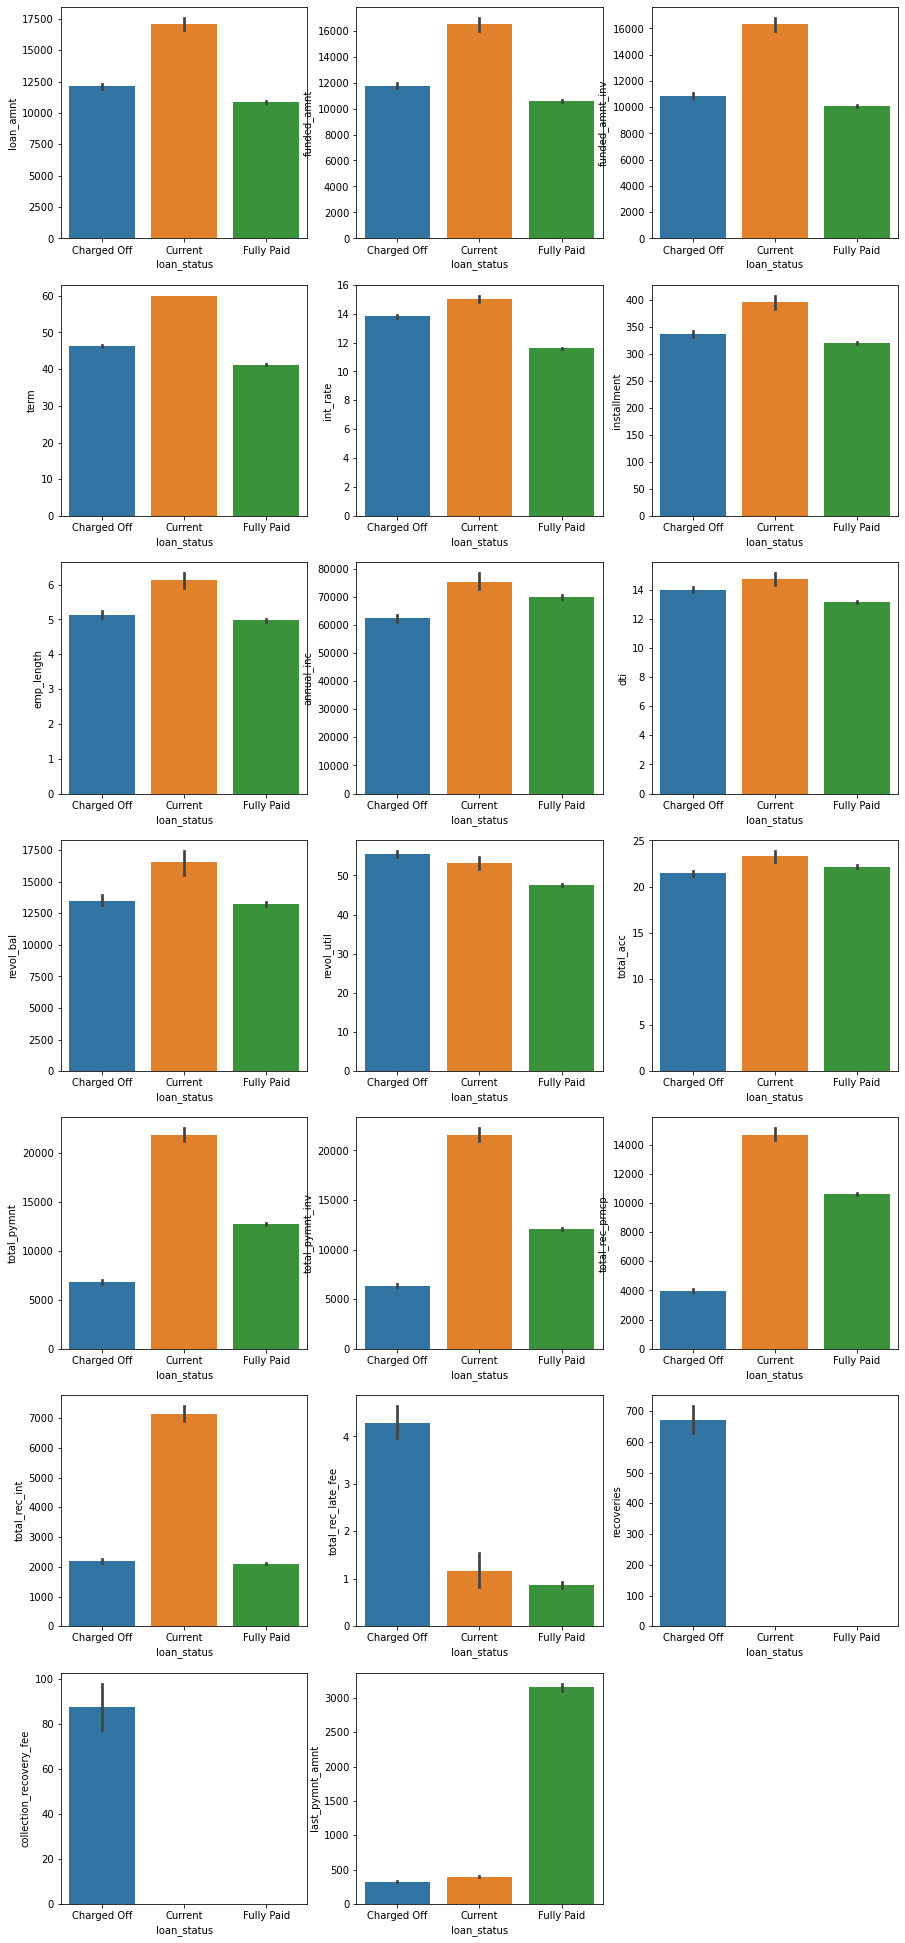

In [50]:
num_data = Data_LC.select_dtypes(include = [np.number])
del num_data['out_prncp']
del num_data['out_prncp_inv']
plt.figure(figsize=(15,40))


for i in range(len(num_data.columns)):
    plt.subplot(8,3, i + 1)
    sns.barplot(y=num_data.columns[i], x='loan_status', data=Data_LC)

plt.show()

Following Points Found
* Higher Interest rate loans have a higher chance of defaulting 
* Higher installments show higher defaulting
* a loan that is consistantly late has a higher chance of defaulting
* Lower annual income has a higher defaulting chance
* Higher Revolving line utilization rate has a higher chance of defaulting


<AxesSubplot:xlabel='Percent_fail', ylabel='Count'>

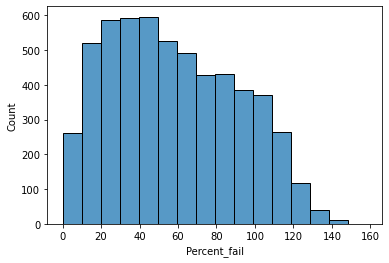

In [51]:
#Lets create a new Data frame to find percent at which there is faulure
Fail=pd.DataFrame()
Fail['Loan_amt']=Data_LC.funded_amnt[Data_LC['loan_status']=='Charged Off']
Fail['Amt_rec']=Data_LC.total_pymnt[Data_LC['loan_status']=='Charged Off']
Fail['Percent_fail']=Fail['Amt_rec']*100/Fail['Loan_amt']
Fail.Percent_fail.describe()
sns.histplot(x=Fail.Percent_fail, bins=16)

Highest chance of defaulting is when the aplicant has paid 20%-50% of the funded amount 

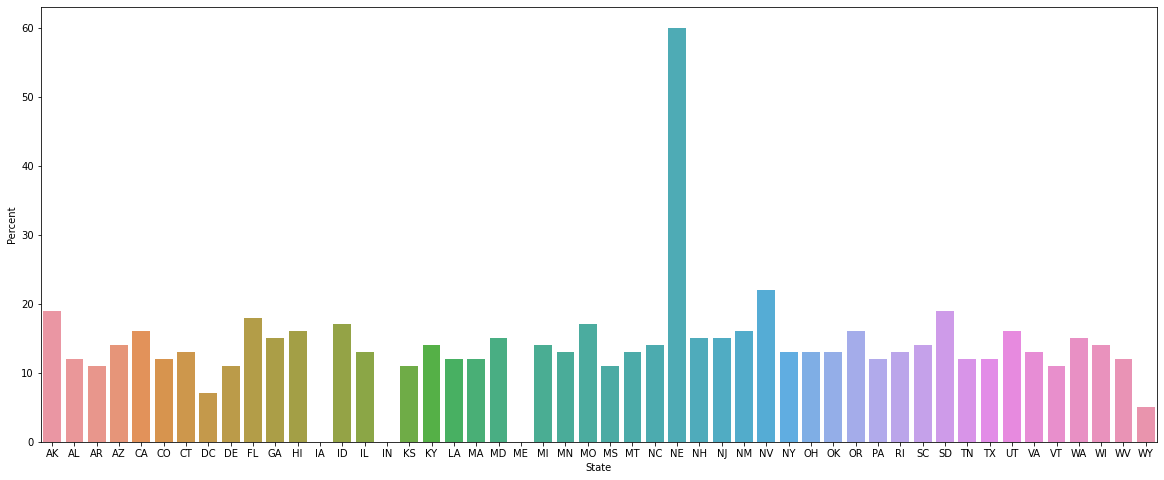

In [52]:
# % of Default / state
temp=Data_LC[Data_LC['loan_status']=='Charged Off']
Def_State=pd.DataFrame()
Def_State['State']=Data_LC.addr_state.unique()
Def_State['Total']=0
Def_State['C_off']=0
for x in range(0,len(Def_State)):
    Def_State.iat[x,1]=len(Data_LC[Data_LC.addr_state ==Def_State.State[x] ])
    Def_State.iat[x,2]=len(temp[temp.addr_state == Def_State.State[x]])
Def_State["Percent"]=round(Def_State.C_off*100/Def_State.Total)
plt.figure(figsize=(20,8))
sns.barplot(x='State',y='Percent',data=Def_State)
plt.show()

Nebraska has the highest percent of defaulters 

<AxesSubplot:xlabel='State'>

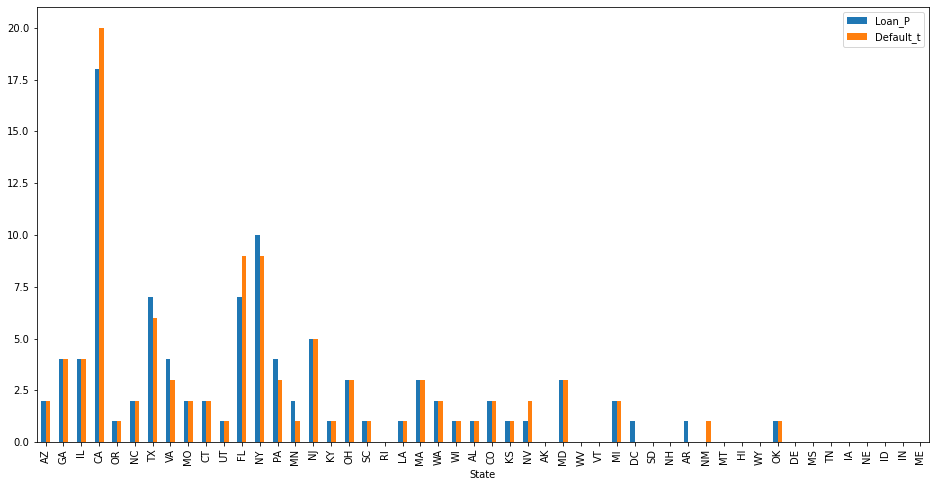

In [53]:
Def_State["Loan_P"]=round(Def_State['Total']*100/sum(Def_State['Total']))
Def_State["Default_t"]=round(Def_State['C_off']*100/sum(Def_State['C_off']))
Def_State.plot(x="State",y=["Loan_P","Default_t"],kind="bar",figsize=(16,8))

Ploting Shows us that the states CA and FL are the worst performing as their contribution to the defaulters is higher than their contribution to the total business in terms of counts. Where as FL , TX ,VA and MN are the good performers.The rest of the states are performing averagly where they contribute to both equaly or have 2 low data to analys

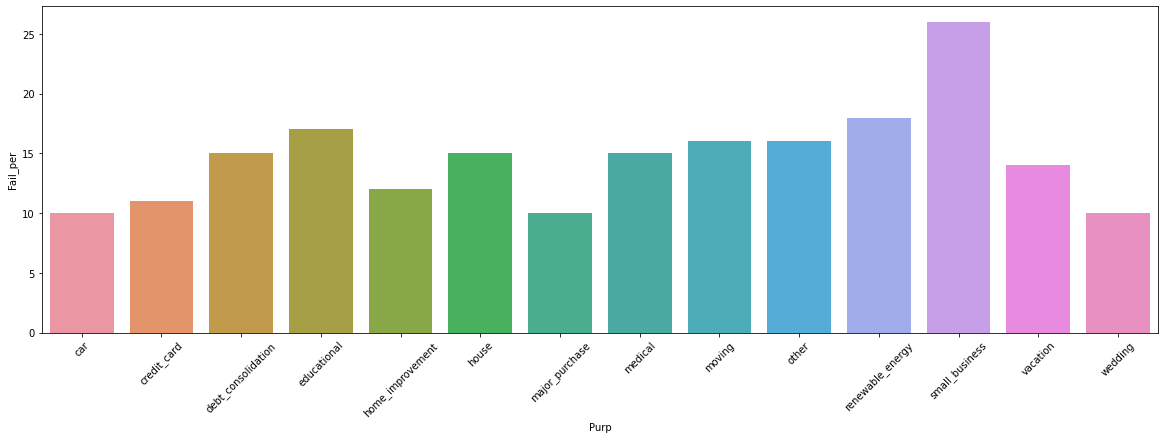

In [54]:
Loan_pur=pd.DataFrame()
Loan_pur['Purp']=Data_LC.purpose.unique()
Loan_pur['Total']=0
Loan_pur['C_off']=0
for x in range(0,len(Loan_pur)):
    Loan_pur.iat[x,1]=len(Data_LC[Data_LC.purpose==Loan_pur.Purp[x]])
    Loan_pur.iat[x,2]=len(temp[temp.purpose==Loan_pur.Purp[x]])
Loan_pur["Fail_per"]=round(Loan_pur.C_off*100/Loan_pur.Total)
plt.figure(figsize=(20,6))
sns.barplot(x=Loan_pur.Purp,y=Loan_pur.Fail_per)
plt.xticks(rotation=45)
plt.show()

Loans taken for small business show the highest chance of Defulting 

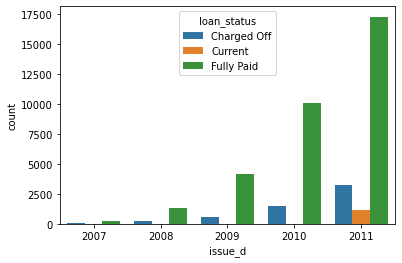

In [55]:
#Lets look at the application by year
sns.countplot(x=pd.DatetimeIndex(Data_LC['issue_d']).year,hue=Data_LC.loan_status)
plt.show()

We see an exponential growth in the number of loans year on year where as there is a steady growth of defaulters .

In [56]:
Data_LC.funded_amnt.describe()

count    39717.000000
mean     10947.713196
std       7187.238670
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

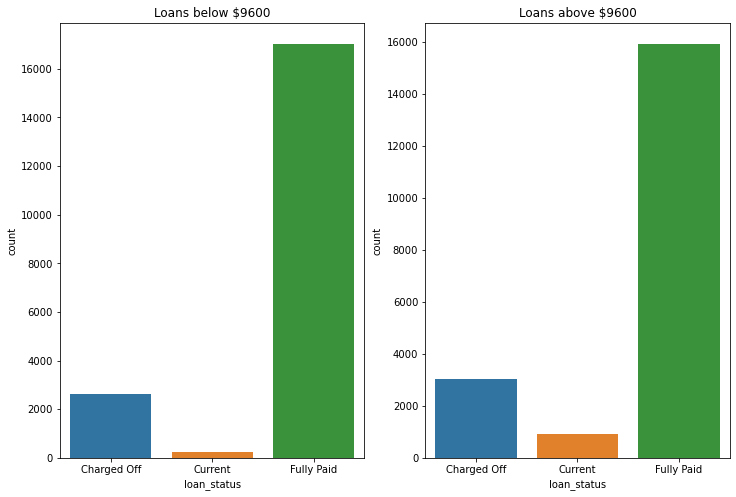

In [57]:
#Lets look at how the lower 50 percentile of loans perform
fig, axes = plt.subplots(1, 2,figsize=(12,8))
sns.countplot(ax=axes[0],x=Data_LC.loan_status[Data_LC.funded_amnt<=9600])
sns.countplot(ax=axes[1],x=Data_LC.loan_status[Data_LC.funded_amnt > 9600 ])
axes[0].set_title("Loans below $9600")
axes[1].set_title("Loans above $9600")
plt.show()

Loans that are higher in value tend to default more 

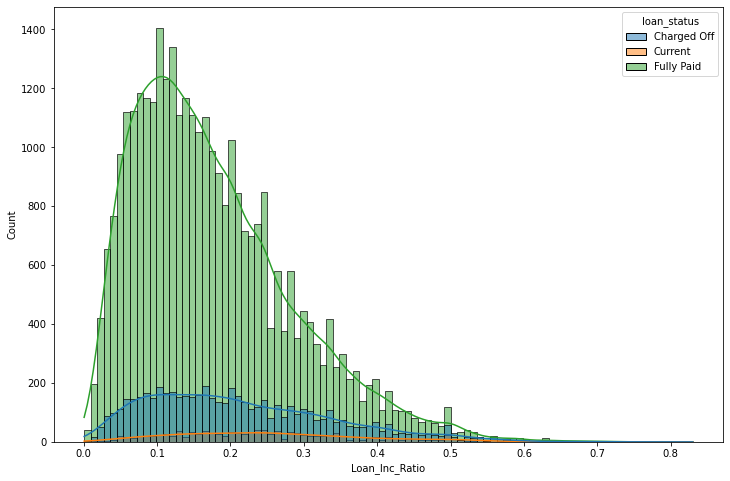

In [58]:
Data_LC["Loan_Inc_Ratio"]=Data_LC.funded_amnt/(Data_LC.annual_inc)
plt.figure(figsize=(12,8))
sns.histplot(x=Data_LC.Loan_Inc_Ratio,hue=Data_LC.loan_status,kde=True)
plt.locator_params(axis="x", nbins=10)
plt.show()

Most of the Defaults happen at a loan to income ration of 0.1

In [59]:

#Making a new column to check profit of a loan
Data_LC['Profit']=Data_LC.total_pymnt-Data_LC.funded_amnt


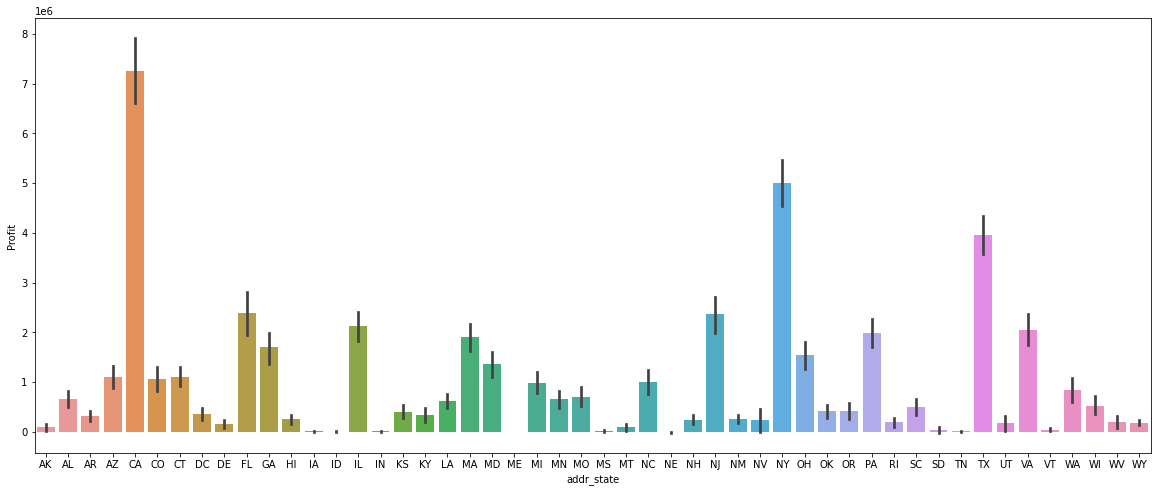

In [60]:
plt.figure(figsize=(20,8))
sns.barplot(x='addr_state',y='Profit',data=Data_LC,estimator=sum)
plt.show()

CA makes the most profit for the LC ,but that is expected as the number of loans are the highest 

In [61]:
profit_st=pd.DataFrame()
profit_st['State']=Data_LC.addr_state.unique()
profit_st['total_profit']=0
profit_st['no of loans']=0
for x in range (len(profit_st)):
    profit_st.iat[x,1]=sum(Data_LC.Profit[Data_LC.addr_state==profit_st.State[x]])
    profit_st.iat[x,2]=len(Data_LC[Data_LC.addr_state==profit_st.State[x]])
profit_st['profit per loan']=profit_st['total_profit']/profit_st['no of loans']
#plt.figure(figsize=(20,8))
#sns.barplot(x=profit_st.State,y=profit_st['profit per loan'])
#plt.show()
fig=px.bar(profit_st,x='State',y='profit per loan',color="no of loans")
fig.show()

Nebraska is the only state that is loosing money on an avrage for every loan, but has only 5 loans issued so the data is too low for analisys.
WY seems like the highest profit but the number of loans are too low for analisys
What we see is that even though CA has the highest number of loans TX makes the most profit per loan and also has a good number of loans issued.

In [62]:
Data_LC['Loan_applied2Funded']=Data_LC.funded_amnt/Data_LC.loan_amnt
px.box(Data_LC,x='loan_status',y='Loan_applied2Funded')

The Ratio of ask to fund is  inconculsive

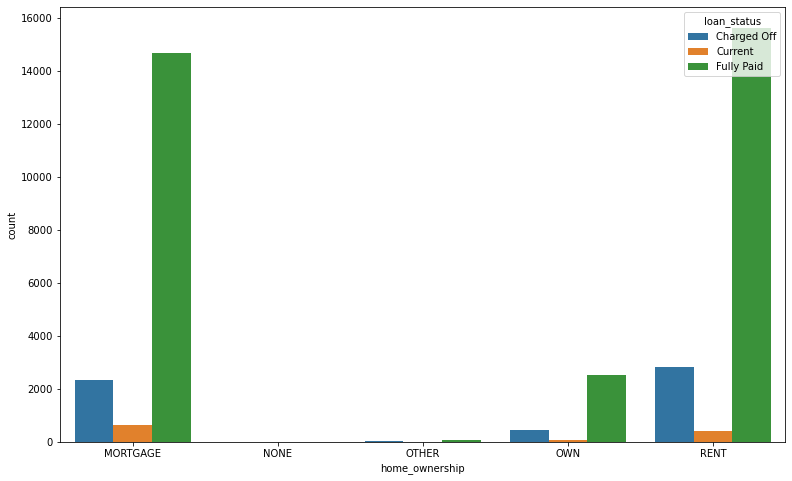

In [63]:
plt.figure(figsize=(13,8))
sns.countplot(data=Data_LC,x='home_ownership' , hue ='loan_status')
plt.show()
#we can see in the bar chart below that the charged off loans that are from the applicants who have a mortgage or rented home  
#are comparatively lower in loans with who have their own accomodation

In [64]:
home_count=pd.DataFrame(Data_LC.home_ownership.value_counts())
home_count

home_ownership
RENT               18899
MORTGAGE           17659
OWN                 3058
OTHER                 98
NONE                   3

In [65]:
home_c=pd.pivot_table(Data_LC,values='annual_inc',index=['home_ownership','loan_status'],aggfunc='count')
home_c.rename({'annual_inc':'count'},axis='columns')
home_c

annual_inc
home_ownership loan_status            
MORTGAGE       Charged Off        2327
               Current             638
               Fully Paid        14694
NONE           Charged Off           0
               Current               0
               Fully Paid            3
OTHER          Charged Off          18
               Current               0
               Fully Paid           80
OWN            Charged Off         443
               Current              83
               Fully Paid         2532
RENT           Charged Off        2839
               Current             419
               Fully Paid        15641

As we can see
* Mortgaged home aplicants defaulted 13% of the times
* Rendted home aplicants defaulted 15% of the times
* Own home aplicants defaulted 14.5% of the times 
There is no statitstical difference except the fact that own home applicants are very few in number.


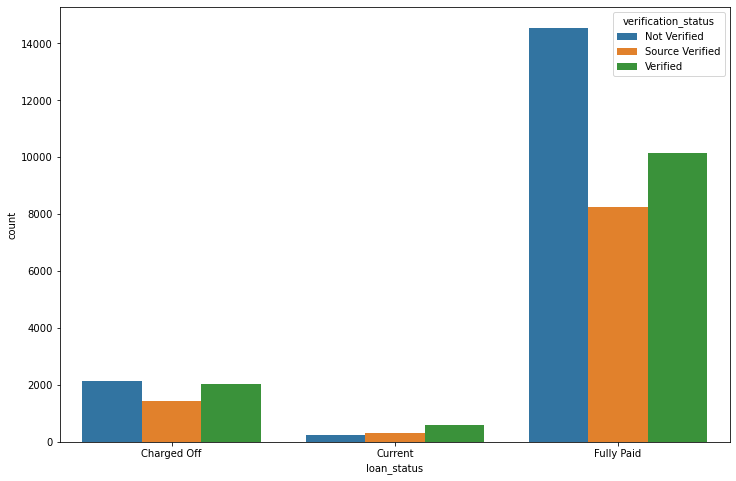

In [66]:
plt.figure(figsize=(12,8))
sns.countplot(data=Data_LC,x='loan_status',hue='verification_status')
plt.show()

In [67]:
Tl=list(range(5000,40000,5000))
amt_data=pd.DataFrame()
amt_data['value']=[str((x-5000))+"-"+str(x) for x in Tl]
amt_data['count_off']=0
amt_data['count_full']=0
y=0
for x in Tl:
    z=x-5000
    amt_data.iat[y,1]=len(Data_LC.loan_amnt[(Data_LC.loan_amnt<=x) &(Data_LC.loan_amnt>z)& (Data_LC.loan_status=="Charged Off")])    
    amt_data.iat[y,2]=len(Data_LC.loan_amnt[(Data_LC.loan_amnt<=x) &(Data_LC.loan_amnt>z)& (Data_LC.loan_status=="Fully Paid")])    
    y=y+1
    
amt_data["Percent off"]=round(amt_data.count_off*100/(amt_data.count_full+amt_data.count_off),2)
amt_data["Percent Paid"]=100-amt_data['Percent off']
fig=px.bar(amt_data,x='value',y=['Percent off','Percent Paid'],labels={'_value':"Percent"})
fig.show()

Defaulters go up as value of the loan goes up

In [68]:
# Loan Vs Income Vs loan status
Data_LC.Loan_Inc_Ratio=Data_LC.Loan_Inc_Ratio.apply(lambda x: round(x,1))
LS=Data_LC.groupby(by = "Loan_Inc_Ratio").loan_status.count()
LSp=pd.DataFrame(LS)
LSp['C_off']=0
for x in range (len(LSp)):
    LSp.iat[x,1]=len(Data_LC[(Data_LC.Loan_Inc_Ratio==LSp.index[x]) & (Data_LC.loan_status=="Charged Off") ])
LSp['percent']=LSp.C_off*100/LSp.loan_status
LSp.percent=LSp.percent.apply(lambda x : round(x,1))

fig=px.bar(y=LSp.percent,x=LSp.index,labels={'y':'Percent of Default','x':'Loan to Income Ratio'})
fig.show()

The rate of Defult increase once we cross an income to loan Ratio of 0.3 i.e Loans given where the loan is grater than 30% of the annual income have a very high rate of defaulting

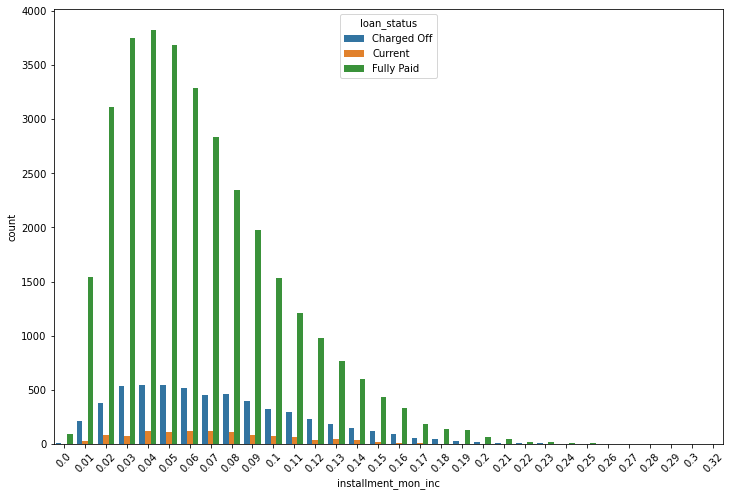

In [69]:
Data_LC['monthly_inc']=Data_LC.annual_inc/12
Data_LC['installment_mon_inc']=Data_LC.installment/Data_LC.monthly_inc
Data_LC.installment_mon_inc=Data_LC.installment_mon_inc.apply(lambda x: round(x,2))
plt.figure(figsize=(12,8))

sns.countplot(data=Data_LC,x='installment_mon_inc',hue='loan_status')
plt.xticks(rotation = 45)
plt.show()

In [80]:
df=pd.DataFrame(Data_LC[Data_LC.installment_mon_inc<0.3].installment_mon_inc.value_counts())
df['C_off']=0
for x in range(len(df)):
    df.iat[x,1]=len((Data_LC[(Data_LC.installment_mon_inc==df.index[x])&(Data_LC.loan_status=="Charged Off")]))
df['percent']=df.C_off*100/df.installment_mon_inc
px.bar(df,x=df.index,y='percent',labels={'index':'Installment to Monthly income Ratio','percent':'% of loans charged off','installment_mon_inc':'No of Loans'},color='installment_mon_inc')


The loans given at an installment value of 22% of monthly income have a very high default rate 

In [89]:
gradedf=pd.DataFrame(Data_LC.grade.value_counts())
gradedf['c_off']=0
for x in range(len(gradedf)):
    gradedf.iat[x,1]=len(Data_LC[(Data_LC.grade==gradedf.index[x])&(Data_LC.loan_status=='Charged Off')])
gradedf['percent']=gradedf.c_off*100/gradedf.grade
gradedf.percent=gradedf.percent.apply(lambda x: round(x,2))
gradedf

grade  c_off  percent
B  12020   1425    11.86
A  10085    602     5.97
C   8098   1347    16.63
D   5307   1118    21.07
E   2842    715    25.16
F   1049    319    30.41
G    316    101    31.96